In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

main_folder = Path('.')

# Make an empty list to store dataframes
all_dataframes = []

# Loop through all subfolders within the main folder
for subfolder in main_folder.iterdir():
    if subfolder.is_dir():
        # Loop through all CSV files within the subfolder
        for csv_file in subfolder.glob('*.csv'):  # Find all CSV files in the folder
            try:
                # Load each CSV file into a pandas dataframe
                df = pd.read_csv(csv_file, encoding='ISO-8859-1', skiprows=7)
            except Exception as e:
                print(f"Error reading {csv_file}: {e}") # Skip to the next file if there's an error
                continue 

            # Add the folder/file name as columns to the dataframe for reference
            df['source_folder'] = subfolder.name
            df['source_file'] = csv_file.name
            
            # Append the dataframe to the list
            all_dataframes.append(df)

# Concatenate all the dataframes into one dataframe
combined_df = pd.concat(all_dataframes, ignore_index=True)

print(combined_df)

      Sample  Frequency(Hz)  Magnitude(dB)  Phase(°) source_folder  \
0          0        1000.00        38.8040  176.9010       100Gain   
1          1        1040.10        38.5560  173.9970       100Gain   
2          2        1081.81        38.5015  174.3030       100Gain   
3          3        1125.19        38.6279  173.9380       100Gain   
4          4        1170.31        38.6392  173.6400       100Gain   
...      ...            ...            ...       ...           ...   
7595     195    22064300.00        27.8870  -94.8243       LMH6624   
7596     196    22764200.00        27.7113  -97.6476       LMH6624   
7597     197    23486300.00        27.6559  -96.1466       LMH6624   
7598     198    24231300.00        27.6687 -101.7710       LMH6624   
7599     199    25000000.00        27.4902  -96.5193       LMH6624   

              source_file  
0     Run1_20mV_Input.csv  
1     Run1_20mV_Input.csv  
2     Run1_20mV_Input.csv  
3     Run1_20mV_Input.csv  
4     Run1_20mV_Inp

In [152]:
# Function to filter out input spikes
def remove_input_spike(df, threshold=2.4):
    clean_df = df.copy()
    
    # Loop through the first 10 rows and compare the current Magnitude with the next
    for i in range(min(10, len(clean_df) - 1)):
        current_magnitude = clean_df['Magnitude(dB)'].iloc[i]
        next_magnitude = clean_df['Magnitude(dB)'].iloc[i + 1]
        
        if current_magnitude > next_magnitude * threshold:
            clean_df = clean_df.drop(clean_df.index[i])
    
    return clean_df

In [153]:
# Plot Frequency (Hz) vs Magnitude (dB)
def plot_frequency_vs_magnitude(df, source_folder, source_file):
    plt.figure(figsize=(8, 6))
    
    # Filter by folder and file
    plot_data = df[(df['source_folder'] == source_folder) & (df['source_file'] == source_file)]
    
    # Filter out input spike
    plot_data_clean = remove_input_spike(plot_data)
    
    plt.plot(plot_data_clean['Frequency(Hz)'], plot_data_clean['Magnitude(dB)'], label=f'{source_folder}/{source_file}')
    
    plt.xscale('log')
    plt.xlabel('Frequency (Hz) [log scale]')
    plt.ylabel('Magnitude (dB)')
    plt.title(f'Frequency vs Magnitude for {source_folder}/{source_file}')
    plt.grid(True, which="major", ls="--")
    plt.legend()
    plt.show()

In [154]:
# Plot Frequency (Hz) vs Phase (°)
def plot_frequency_vs_phase(df, source_folder, source_file):
    plt.figure(figsize=(8, 6))
    
    # Filter by folder and file
    plot_data = df[(df['source_folder'] == source_folder) & (df['source_file'] == source_file)]
    
    plt.plot(plot_data['Frequency(Hz)'], plot_data['Phase(°)'], label=f'{source_folder}/{source_file}')
    
    plt.xscale('log')
    plt.xlabel('Frequency (Hz) [log scale]')
    plt.ylabel('Phase(°)')
    plt.title(f'Frequency vs Phase for {source_folder}/{source_file}')
    plt.grid(True, which="major", ls="--")
    plt.legend()
    plt.show()

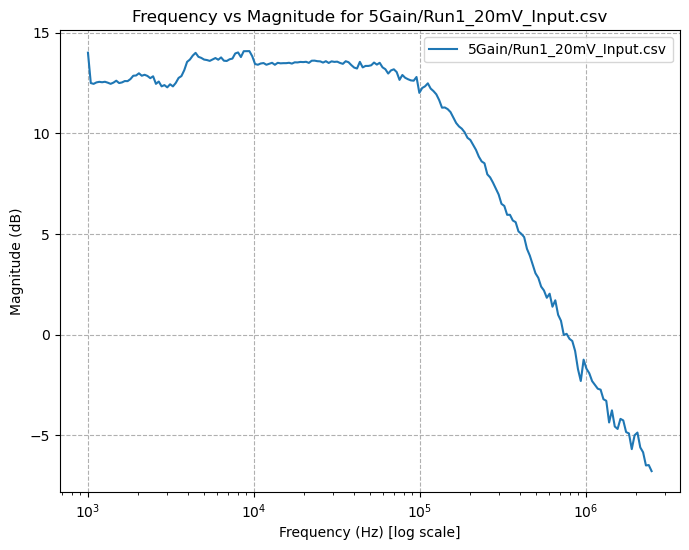

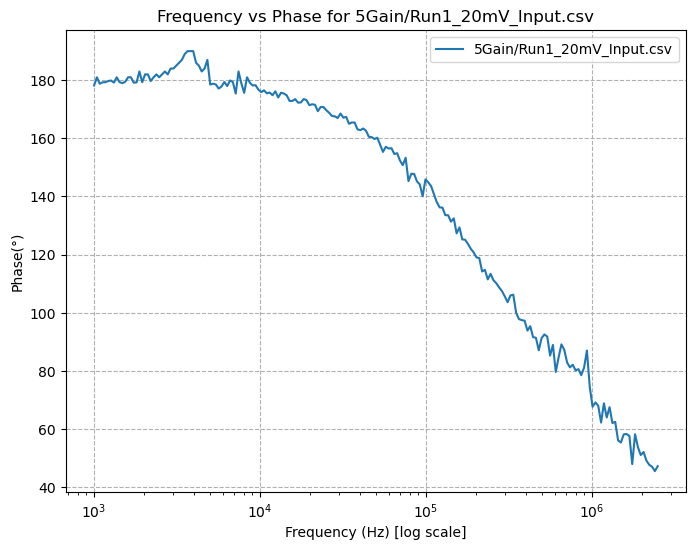

In [155]:
# Pick dataset
source_folder_to_plot = '5Gain'  # Replace with folder name
source_file_to_plot = 'Run1_20mV_Input.csv'  # Replace with file name

# Call the plot functions for the specific folder and file
plot_frequency_vs_magnitude(combined_df, source_folder_to_plot, source_file_to_plot)
plot_frequency_vs_phase(combined_df, source_folder_to_plot, source_file_to_plot)

In [156]:
# Plot Frequency (Hz) vs Magnitude (dB) for all files in a folder
def plot_all_files_magnitude(df, source_folder):
    plt.figure(figsize=(8, 6))
    
    # Filter by EB folder
    folder_data = df[df['source_folder'] == source_folder]
    files_in_folder = folder_data['source_file'].unique()
    
    # Loop through each file and plot its data
    for source_file in files_in_folder:
        plot_data = folder_data[folder_data['source_file'] == source_file]
        
        # Filter out input spike
        plot_data_clean = remove_input_spike(plot_data)
        
        plt.plot(plot_data_clean['Frequency(Hz)'], plot_data_clean['Magnitude(dB)'], label=source_file)
    
    plt.xscale('log')
    plt.xlabel('Frequency (Hz) [log scale]')
    plt.ylabel('Magnitude (dB)')
    plt.title(f'Frequency vs Magnitude for All Files in {source_folder}')
    plt.grid(True, which="major", ls="--")
    plt.legend()
    plt.show()

In [157]:
# Plot Frequency (Hz) vs Phase (°) for all files in a folder
def plot_all_files_phase(df, source_folder):
    plt.figure(figsize=(8, 6))
    
    # Filter by EB folder
    folder_data = df[df['source_folder'] == source_folder]
    files_in_folder = folder_data['source_file'].unique()
    
    # Loop through each file and plot its data
    for source_file in files_in_folder:
        plot_data = folder_data[folder_data['source_file'] == source_file]
        plt.plot(plot_data['Frequency(Hz)'], plot_data['Phase(°)'], label=source_file)
    
    plt.xscale('log')
    plt.xlabel('Frequency (Hz) [log scale]')
    plt.ylabel('Phase (degree)')
    plt.title(f'Frequency vs Phase for All Files in {source_folder}')
    plt.grid(True, which="major", ls="--")
    plt.legend()
    plt.show()

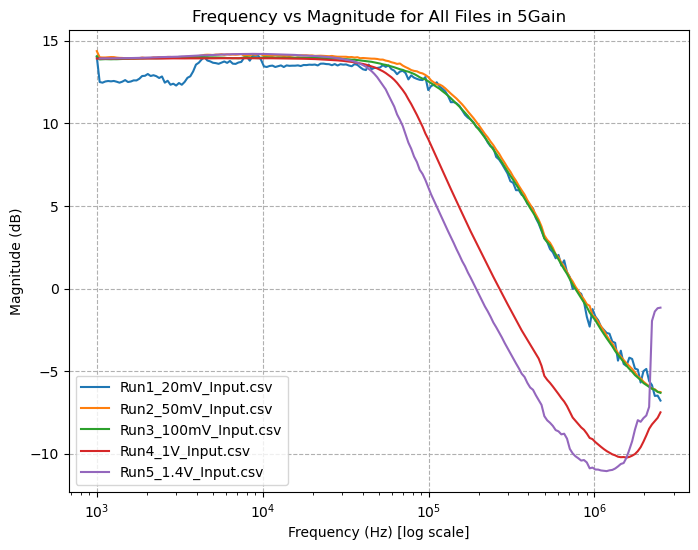

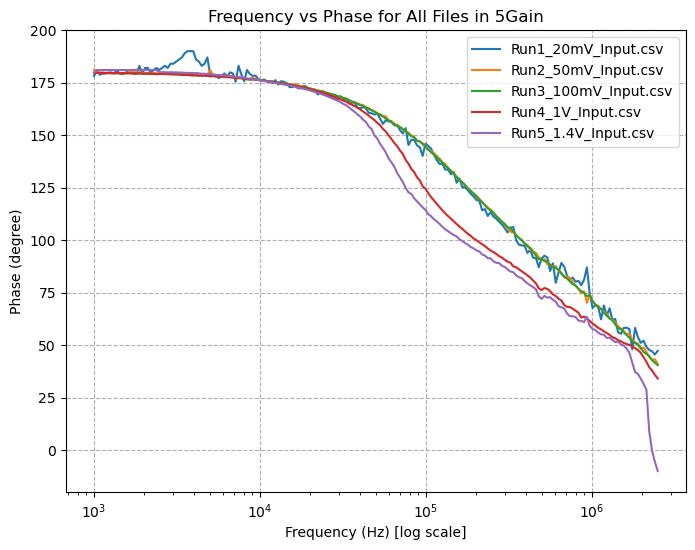

In [158]:
# Pick folder of EB's to plot
source_folder_to_plot = '5Gain'  # Replace with desired folder name

plot_all_files_magnitude(combined_df, source_folder_to_plot)
plot_all_files_phase(combined_df, source_folder_to_plot)